## Bitcoin Data Analysis

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df= pd.read_csv(r'C:\Users\dines\Downloads\bitcoin_price_Training - Training.csv')

In [5]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [7]:
df.shape

(1556, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


### Data Preprocessing

 Doing Data Pre-processing !
        Check whether data-types are correct or not 
        check whether Data have missing value or not 
        check whether data have duplicate entries or not !
        

In [10]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [11]:
df['Date']=df['Date'].astype('datetime64[ns]')

### Date is to be in Date-time format inorder to perform a time series analysis but In the current dataset 
   ### the date is stated as an object which is to be converted in the date time format..
### all end （ the least significant byte is stored in the smallest addres



In [12]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [13]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [14]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [17]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Market Cap
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [18]:
df.sort_index(ascending=False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


### What was the change in price of  stock over time?

In [19]:
data=df.sort_index(ascending=False).reset_index()

In [20]:
data.drop('index',axis=1,inplace=True)

In [21]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

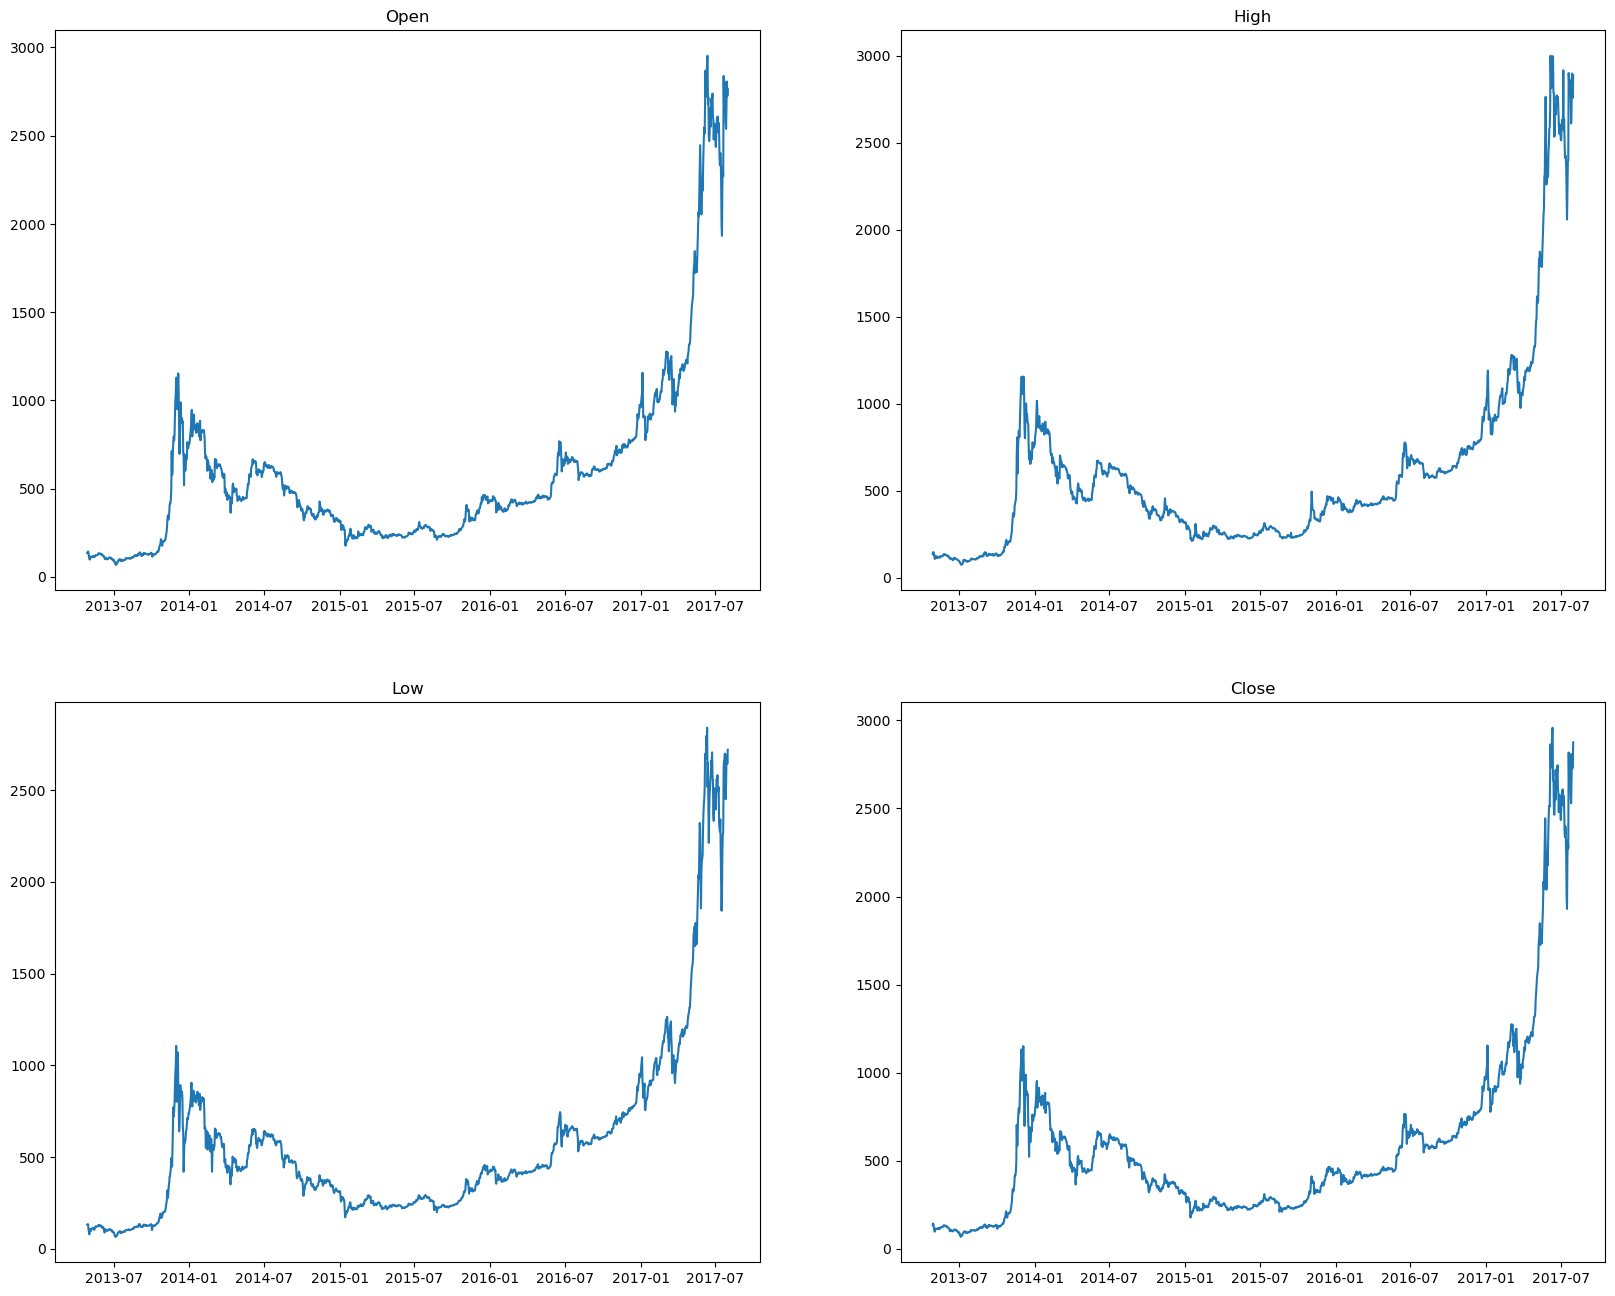

In [22]:
plt.figure(figsize=(20,16))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'],df[col])
    plt.title(col)

### Analysing the open,High,close,Low values of Bitcoin

In [23]:
Bitcoin_sample=data[0:50]

In [24]:
!pip install chart_studio
!pip install plotly

In [25]:
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import plotly.express as px

from plotly.offline import download_plotlyjs ,init_notebook_mode,plot,iplot

In [26]:
init_notebook_mode(connected=True)

In [27]:
trace=go.Candlestick(x=Bitcoin_sample['Date'],
                      open=Bitcoin_sample['Open'],
                      high=Bitcoin_sample['High'],
                      low=Bitcoin_sample['Low'],
                      close=Bitcoin_sample['Close'])

In [28]:
candle_data=[trace]
layout={'title':'Bitcoin Historical Prices',
        'xaxis':{'title':'Date'}
       }


In [29]:
fig=go.Figure(candle_data,layout=layout)

In [30]:
fig.show()

### Analyzing the closing price

In [31]:
data.set_index('Date',inplace=True)

In [32]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<AxesSubplot:xlabel='Date'>

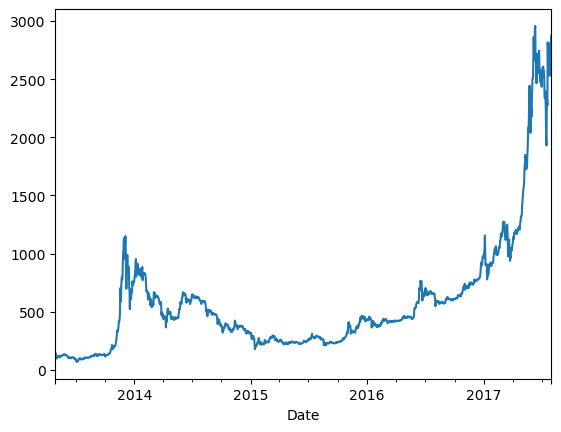

In [33]:
data['Close'].plot()

## On above plot , Our x-indices are number , lets first set "date" as your index so that u will get date on "x-indexes"
## as we are using pandas plot "data['Close'].plot()" , so for pandas plot our row indexes must be Date.

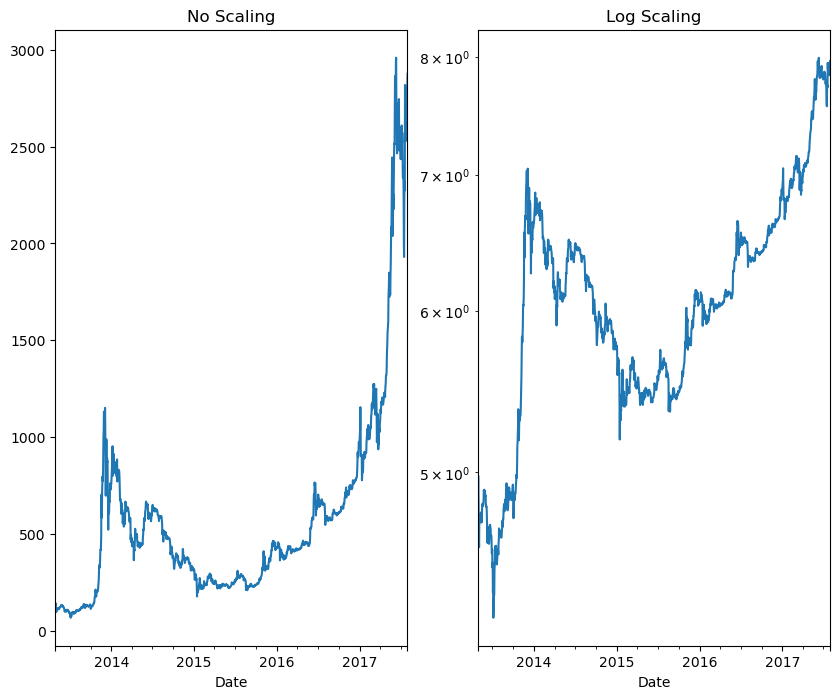

In [35]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log Scaling')
plt.yscale('log')

## Logarithmic price scales are better than linear price scales at showing less severe price increases or decreases..

### log scale is always better if u have outliers or some high values in data

Some features of the plot above:

    There is an up-ward trend from 2016 for each graph
    There is no seasonality
    There are no outliers


### Analyzing Bitcoin price on Quarterly basis,yearly and monthly basis.

In [36]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"


In [37]:
data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

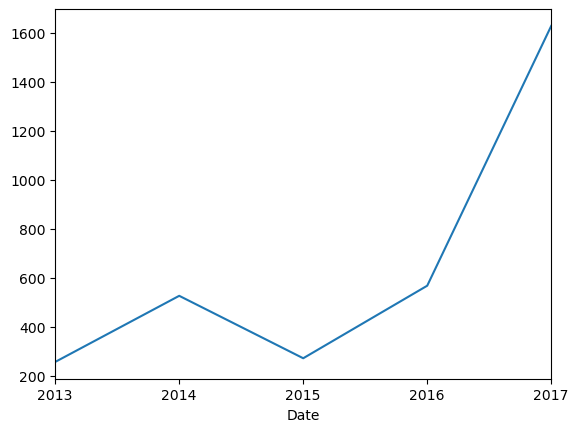

In [38]:
data['Close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

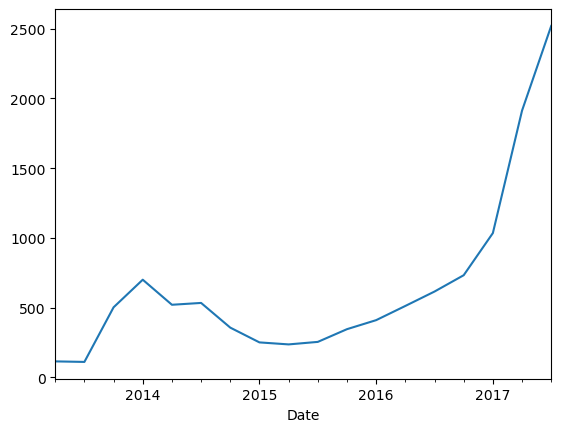

In [39]:
data['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

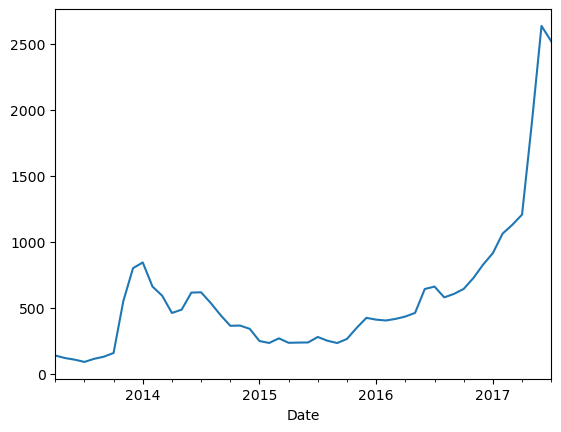

In [40]:
data['Close'].resample('M').mean().plot()